<a href="https://colab.research.google.com/github/T-mang/misc/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!apt-get update
!apt-get install openjdk-8-jre-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

import os
from os.path import join, abspath
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

!ls

import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

from pyspark.sql import Row
warehouse_location = abspath('spark-warehouse')

import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

spark = SparkSession \
      .builder \
      .config("spark.sql.warehouse.dir", warehouse_location) \
      .enableHiveSupport() \
      .getOrCreate()
spark

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa

Given data file, coma separated, without headers (https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)

In [9]:
spark.sql("create schema if not exists test")

DataFrame[]

In [10]:
spark.sql("""create table if not exists test.src2 ( id string, first_name STRING, \
last_name STRING, gender STRING, city String, JobTitle String, \
Salary STRING, Latitude string, Longitude string) \
ROW FORMAT DELIMITED FIELDS TERMINATED BY "," \
tblproperties("skip.header.line.count"="1") \
stored AS textfile""")

DataFrame[]

In [11]:
original_df = spark.read.csv("imports-85.data", inferSchema = True, header = False)
original_df.show()

+---+---+-----------+---+-----+----+-----------+---+-----+-----+-----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+
|_c0|_c1|        _c2|_c3|  _c4| _c5|        _c6|_c7|  _c8|  _c9| _c10|_c11|_c12|_c13|_c14| _c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24| _c25|
+---+---+-----------+---+-----+----+-----------+---+-----+-----+-----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+
|  3|  ?|alfa-romero|gas|  std| two|convertible|rwd|front| 88.6|168.8|64.1|48.8|2548|dohc| four| 130|mpfi|3.47|2.68| 9.0| 111|5000|  21|  27|13495|
|  3|  ?|alfa-romero|gas|  std| two|convertible|rwd|front| 88.6|168.8|64.1|48.8|2548|dohc| four| 130|mpfi|3.47|2.68| 9.0| 111|5000|  21|  27|16500|
|  1|  ?|alfa-romero|gas|  std| two|  hatchback|rwd|front| 94.5|171.2|65.5|52.4|2823|ohcv|  six| 152|mpfi|2.68|3.47| 9.0| 154|5000|  19|  26|16500|
|  2|164|       audi|gas|  std|four|      sedan|fwd|front| 99.8|176.6|66.2|54.3|2337| ohc| four| 109|mpfi|3.19|3

In [12]:
oldColumns = original_df.schema.names
print(oldColumns)

['_c0', '_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7', '_c8', '_c9', '_c10', '_c11', '_c12', '_c13', '_c14', '_c15', '_c16', '_c17', '_c18', '_c19', '_c20', '_c21', '_c22', '_c23', '_c24', '_c25']


In [13]:
newColumns = ["symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors","body_style","drive_wheels","engine_location","wheel_base","length","width","height","curb_weight","engine_type","num_of_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]

In [14]:
for c,n in zip(original_df.columns, newColumns):
  original_df = original_df.withColumnRenamed(c,n)

In [15]:
original_df.show()

+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized_losses|       make|fuel_type|aspiration|num_of_doors| body_style|drive_wheels|engine_location|wheel_base|length|width|height|curb_weight|engine_type|num_of_cylinders|engine_size|fuel_system|bore|stroke|compression_ratio|horsepower|peak_rpm|city_mpg|highway_mpg|price|
+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        3|                ?|alfa-romero|      gas|       std|         two|convertible|         rwd|          front|      88.6| 16

In [16]:
original_df.dtypes

[('symboling', 'int'),
 ('normalized_losses', 'string'),
 ('make', 'string'),
 ('fuel_type', 'string'),
 ('aspiration', 'string'),
 ('num_of_doors', 'string'),
 ('body_style', 'string'),
 ('drive_wheels', 'string'),
 ('engine_location', 'string'),
 ('wheel_base', 'double'),
 ('length', 'double'),
 ('width', 'double'),
 ('height', 'double'),
 ('curb_weight', 'int'),
 ('engine_type', 'string'),
 ('num_of_cylinders', 'string'),
 ('engine_size', 'int'),
 ('fuel_system', 'string'),
 ('bore', 'string'),
 ('stroke', 'string'),
 ('compression_ratio', 'double'),
 ('horsepower', 'string'),
 ('peak_rpm', 'string'),
 ('city_mpg', 'int'),
 ('highway_mpg', 'int'),
 ('price', 'string')]

In [17]:
original_df.describe().show()

+-------+------------------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+------------------+------------------+-----------------+------------------+------------------+-----------+----------------+------------------+-----------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+
|summary|         symboling|normalized_losses|       make|fuel_type|aspiration|num_of_doors| body_style|drive_wheels|engine_location|        wheel_base|            length|            width|            height|       curb_weight|engine_type|num_of_cylinders|       engine_size|fuel_system|              bore|            stroke| compression_ratio|        horsepower|         peak_rpm|         city_mpg|      highway_mpg|             price|
+-------+------------------+-----------------+-----------+---------+----------+------------+-----------+------------+---------

In [18]:
original_df.createOrReplaceTempView("table1")
spark.sql( "select * from table1 where price ='?'").show()

+---------+-----------------+-------+---------+----------+------------+----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized_losses|   make|fuel_type|aspiration|num_of_doors|body_style|drive_wheels|engine_location|wheel_base|length|width|height|curb_weight|engine_type|num_of_cylinders|engine_size|fuel_system|bore|stroke|compression_ratio|horsepower|peak_rpm|city_mpg|highway_mpg|price|
+---------+-----------------+-------+---------+----------+------------+----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        0|                ?|   audi|      gas|     turbo|         two| hatchback|         4wd|          front|      99.5| 178.2| 67.9|  52.0|   

In [19]:
cars_df = spark.sql("select * from table1 where price <> '?'")
cars_df.show()

+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized_losses|       make|fuel_type|aspiration|num_of_doors| body_style|drive_wheels|engine_location|wheel_base|length|width|height|curb_weight|engine_type|num_of_cylinders|engine_size|fuel_system|bore|stroke|compression_ratio|horsepower|peak_rpm|city_mpg|highway_mpg|price|
+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        3|                ?|alfa-romero|      gas|       std|         two|convertible|         rwd|          front|      88.6| 16

In [20]:
cars_df.columns

['symboling',
 'normalized_losses',
 'make',
 'fuel_type',
 'aspiration',
 'num_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_type',
 'num_of_cylinders',
 'engine_size',
 'fuel_system',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

to replace missing "normalized-losses" with mean, calculate mean then use replace
convert "city-mpg" values to L/100km --the metric version. To transform mpg to L/100km we need to divide 235 by each value in the city-mpg column, rename the column
incorrect data types for price


In [21]:
import numpy as np
normlosses = spark.sql("select normalized_losses from table1  where normalized_losses <> '?'") 

normlosses.show(5)

+-----------------+
|normalized_losses|
+-----------------+
|              164|
|              164|
|              158|
|              158|
|              192|
+-----------------+
only showing top 5 rows



In [22]:
import numpy as np
normlosses = [row[0] for row in spark.sql("select cast(normalized_losses as integer) from table1  where normalized_losses <> '?'").collect() ]
print(normlosses)

[164, 164, 158, 158, 192, 192, 188, 188, 121, 98, 81, 118, 118, 118, 148, 148, 148, 148, 110, 145, 137, 137, 101, 101, 101, 110, 78, 106, 106, 85, 85, 85, 107, 145, 104, 104, 104, 113, 113, 150, 150, 150, 150, 129, 115, 129, 115, 115, 118, 93, 93, 93, 93, 142, 161, 161, 161, 161, 153, 153, 125, 125, 125, 137, 128, 128, 128, 122, 103, 128, 128, 122, 103, 168, 106, 106, 128, 108, 108, 194, 194, 231, 161, 161, 161, 161, 161, 161, 161, 119, 119, 154, 154, 154, 74, 186, 150, 104, 150, 104, 150, 104, 83, 83, 83, 102, 102, 102, 102, 102, 89, 89, 85, 85, 87, 87, 74, 77, 81, 91, 91, 91, 91, 91, 91, 91, 91, 168, 168, 168, 168, 134, 134, 134, 134, 134, 134, 65, 65, 65, 65, 65, 197, 197, 90, 122, 122, 94, 94, 94, 94, 94, 256, 103, 74, 103, 74, 103, 74, 95, 95, 95, 95, 95]


In [23]:

mean_v = np.mean(normlosses)
print(mean_v)

122.0


In [24]:
spark.sql("select * from table1 where normalized_losses = '?'").show()

+---------+-----------------+-------------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized_losses|         make|fuel_type|aspiration|num_of_doors| body_style|drive_wheels|engine_location|wheel_base|length|width|height|curb_weight|engine_type|num_of_cylinders|engine_size|fuel_system|bore|stroke|compression_ratio|horsepower|peak_rpm|city_mpg|highway_mpg|price|
+---------+-----------------+-------------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        3|                ?|  alfa-romero|      gas|       std|         two|convertible|         rwd|          front|      

In [25]:
import pyspark.sql.functions as sqlfunc
from pyspark.sql.functions import col, when
from pyspark.sql.functions import lit

cars_df0 = cars_df.withColumn("normalized_losses1", when(col("normalized_losses") == '?', lit(mean_v)).otherwise(col("normalized_losses")) )
cars_df0.show()

+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+------------------+
|symboling|normalized_losses|       make|fuel_type|aspiration|num_of_doors| body_style|drive_wheels|engine_location|wheel_base|length|width|height|curb_weight|engine_type|num_of_cylinders|engine_size|fuel_system|bore|stroke|compression_ratio|horsepower|peak_rpm|city_mpg|highway_mpg|price|normalized_losses1|
+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+------------------+
|        3|                ?|alfa-romero|      gas|       std|         tw

In [26]:
cars_df1 = cars_df0.withColumn('city_L_100km', 235/cars_df['city_mpg'])
cars_df2 = cars_df1.withColumn('highway_L_100km', 235 / cars_df1['highway_mpg'])  
cars_df2.show()

+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+------------------+------------------+------------------+
|symboling|normalized_losses|       make|fuel_type|aspiration|num_of_doors| body_style|drive_wheels|engine_location|wheel_base|length|width|height|curb_weight|engine_type|num_of_cylinders|engine_size|fuel_system|bore|stroke|compression_ratio|horsepower|peak_rpm|city_mpg|highway_mpg|price|normalized_losses1|      city_L_100km|   highway_L_100km|
+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+-----------------

In [27]:
cars_df2.printSchema()

root
 |-- symboling: integer (nullable = true)
 |-- normalized_losses: string (nullable = true)
 |-- make: string (nullable = true)
 |-- fuel_type: string (nullable = true)
 |-- aspiration: string (nullable = true)
 |-- num_of_doors: string (nullable = true)
 |-- body_style: string (nullable = true)
 |-- drive_wheels: string (nullable = true)
 |-- engine_location: string (nullable = true)
 |-- wheel_base: double (nullable = true)
 |-- length: double (nullable = true)
 |-- width: double (nullable = true)
 |-- height: double (nullable = true)
 |-- curb_weight: integer (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- num_of_cylinders: string (nullable = true)
 |-- engine_size: integer (nullable = true)
 |-- fuel_system: string (nullable = true)
 |-- bore: string (nullable = true)
 |-- stroke: string (nullable = true)
 |-- compression_ratio: double (nullable = true)
 |-- horsepower: string (nullable = true)
 |-- peak_rpm: string (nullable = true)
 |-- city_mpg: integer (nu

Methods to normalize data; 1) Simple feature scaling == just divides each value by the maximum for that feature This makes new values range between o and 1 2)The second method, called “Min-Max”, takes each value, X_old, subtracted from the minimum value of that feature, then divides by the range of that feature. Again, the resulting new values range between 0 and 1. 3)The third method is called “z-score” or “standard score”. In this formula, for each value, you subtract the Mu which is the average of the feature, and then divide by the standard deviation (sigma). The resulting values hover around 0, and typically range between -3 and +3, but can be higher or lower.

In [28]:
cars_df2.createOrReplaceTempView("table2")
#spark.sql("select * from table2").show()
cars_fnl_df = spark.sql("""select symboling, \
 normalized_losses1 as normalized_losses, \
 make,\
 fuel_type,\
 aspiration,\
 num_of_doors,\
 body_style,\
 drive_wheels,\
 engine_location,\
 wheel_base,\
 length,\
 width,\
 height,\
 curb_weight,\
 engine_type,\
 num_of_cylinders,\
 engine_size,\
 fuel_system,\
 bore,\
 stroke,\
 compression_ratio,\
 horsepower,\
 peak_rpm,\
 city_L_100km,\
 highway_L_100km,\
 cast(price as integer) from table2 """)
cars_fnl_df.show()

+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+------------------+------------------+-----+
|symboling|normalized_losses|       make|fuel_type|aspiration|num_of_doors| body_style|drive_wheels|engine_location|wheel_base|length|width|height|curb_weight|engine_type|num_of_cylinders|engine_size|fuel_system|bore|stroke|compression_ratio|horsepower|peak_rpm|      city_L_100km|   highway_L_100km|price|
+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+------------------+------------------+-----+
|        3|            122.0|alfa-romero|      gas|       std|         two|conv

In [29]:
#categirical variables


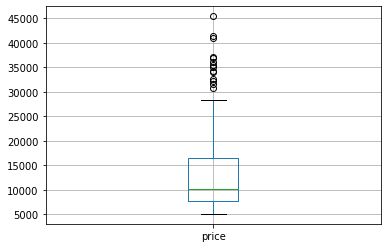

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
pd_fnl_df = cars_fnl_df.toPandas()
boxplot = pd_fnl_df.boxplot(column='price')
#plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


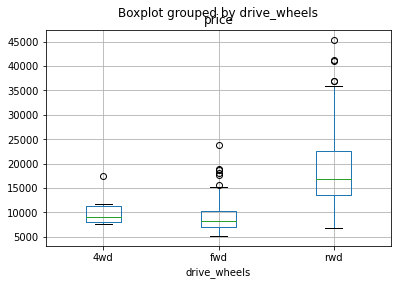

In [31]:
boxplot= pd_fnl_df.boxplot(column='price', by='drive_wheels')

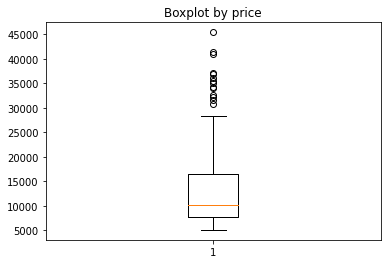

In [32]:
data = pd_fnl_df['price']
fig1,ax1 = plt.subplots()
ax1.set_title('Boxplot by price' )
ax1.boxplot(data)
plt.show()

In [33]:
df_corr = pd_fnl_df[["engine_size","price"]]
df_corr.corr()

,engine_size,price
engine_size,1.000000,0.872335
price,0.872335,1.000000


(0.0, 53112.962596984005)

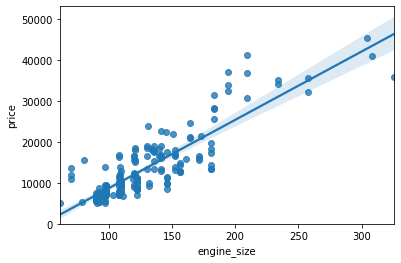

In [34]:
sns.regplot(x="engine_size", y="price", data = df_corr)
plt.ylim(0,)

In [35]:


result = cars_df.printSchema()

root
 |-- symboling: integer (nullable = true)
 |-- normalized_losses: string (nullable = true)
 |-- make: string (nullable = true)
 |-- fuel_type: string (nullable = true)
 |-- aspiration: string (nullable = true)
 |-- num_of_doors: string (nullable = true)
 |-- body_style: string (nullable = true)
 |-- drive_wheels: string (nullable = true)
 |-- engine_location: string (nullable = true)
 |-- wheel_base: double (nullable = true)
 |-- length: double (nullable = true)
 |-- width: double (nullable = true)
 |-- height: double (nullable = true)
 |-- curb_weight: integer (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- num_of_cylinders: string (nullable = true)
 |-- engine_size: integer (nullable = true)
 |-- fuel_system: string (nullable = true)
 |-- bore: string (nullable = true)
 |-- stroke: string (nullable = true)
 |-- compression_ratio: double (nullable = true)
 |-- horsepower: string (nullable = true)
 |-- peak_rpm: string (nullable = true)
 |-- city_mpg: integer (nu

In [41]:
cars_df.createOrReplaceTempView("table3")
#spark.sql("select * from table3").show()
cars_fnl_df1 = spark.sql("""select symboling, \
 normalized_losses, \
 make,\
 fuel_type,\
 aspiration,\
 num_of_doors,\
 body_style,\
 drive_wheels,\
 engine_location,\
 wheel_base,\
 length,\
 width,\
 height,\
 curb_weight,\
 engine_type,\
 num_of_cylinders,\
 engine_size,\
 fuel_system,\
 bore,\
 stroke,\
 compression_ratio,\
 horsepower,\
 peak_rpm,\
 city_mpg,\
 highway_mpg,\
 cast(price as integer) from table3 """)
cars_fnl_df1.show()

+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized_losses|       make|fuel_type|aspiration|num_of_doors| body_style|drive_wheels|engine_location|wheel_base|length|width|height|curb_weight|engine_type|num_of_cylinders|engine_size|fuel_system|bore|stroke|compression_ratio|horsepower|peak_rpm|city_mpg|highway_mpg|price|
+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        3|                ?|alfa-romero|      gas|       std|         two|convertible|         rwd|          front|      88.6| 16

(0.0, 48173.114616028484)

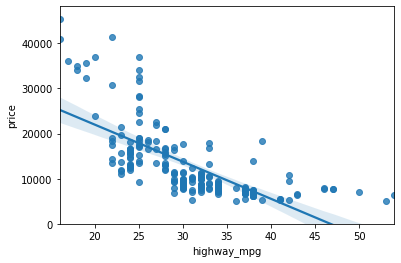

In [74]:
pd_df = cars_fnl_df1.toPandas()
sns.regplot(x="highway_mpg", y="price",data=pd_df)
plt.ylim(0,)

In [67]:
test_df = spark.sql(" select drive_wheels, body_style,avg(price) as avg_price from table3 group by drive_wheels, body_style ")
test_df.show()

+------------+-----------+------------------+
|drive_wheels| body_style|         avg_price|
+------------+-----------+------------------+
|         rwd|  hatchback|14337.777777777777|
|         4wd|      sedan|12647.333333333334|
|         rwd|    hardtop|24202.714285714286|
|         4wd|  hatchback|            7603.0|
|         fwd|    hardtop|            8249.0|
|         rwd|      wagon|16994.222222222223|
|         fwd|      wagon| 9997.333333333334|
|         rwd|      sedan|21711.833333333332|
|         fwd|      sedan|            9811.8|
|         fwd|convertible|           11595.0|
|         rwd|convertible|           23949.6|
|         fwd|  hatchback| 8396.387755102041|
|         4wd|      wagon|           9095.75|
+------------+-----------+------------------+



In [51]:
df_grp = spark.sql("""select make, drive_wheels,body_style, avg(price) as avg_price \
                    from table3 group by make, drive_wheels,body_style \
                    order by body_style, avg(price) desc """)
df_grp.show()

+-------------+------------+-----------+------------------+
|         make|drive_wheels| body_style|         avg_price|
+-------------+------------+-----------+------------------+
|      porsche|         rwd|convertible|           37028.0|
|mercedes-benz|         rwd|convertible|           35056.0|
|       toyota|         rwd|convertible|           17669.0|
|  alfa-romero|         rwd|convertible|           14997.5|
|   volkswagen|         fwd|convertible|           11595.0|
|mercedes-benz|         rwd|    hardtop|           36788.0|
|      porsche|         rwd|    hardtop|           33278.0|
|       toyota|         rwd|    hardtop| 9762.333333333334|
|       nissan|         fwd|    hardtop|            8249.0|
|      porsche|         rwd|  hatchback|           22018.0|
|       nissan|         rwd|  hatchback|18432.333333333332|
|      mercury|         rwd|  hatchback|           16503.0|
|  alfa-romero|         rwd|  hatchback|           16500.0|
|         saab|         fwd|  hatchback|

In [70]:
df_p = df_grp.toPandas()
#df_p = pd.pivot_table(df_grp, index=["drive_wheels"], values='avg_price', columns='body_style')
df_pivot = df_p.pivot_table(df_p, index=["drive_wheels"], columns=["body_style"])
#, values='avg_price', columns='body_style')
df_pivot

avg_price                ...                            
body_style   convertible       hardtop  ...         sedan         wagon
drive_wheels                            ...                            
4wd                  NaN           NaN  ...  13848.000000   9095.750000
fwd            11595.000   8249.000000  ...   9754.587632  10145.129630
rwd            26187.625  26609.444444  ...  20548.816220  18827.208333

[3 rows x 5 columns]

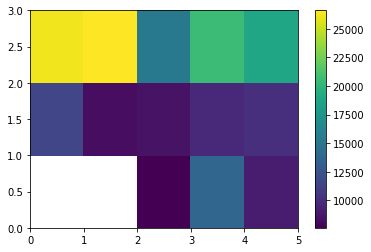

In [71]:
plt.pcolor(df_pivot)
plt.colorbar()
plt.show()